In [1]:
# Before presentation October 28
import georasters as gr
import numpy as np
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

# import fiona
from shapely.geometry import Point, shape
# import shapefile as shp
import seaborn as sns
# import folium
import folium
import folium.plugins as plugins
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime
# import ee
import ee
import geemap
ee.Initialize()

#import pycr
import geopy

# Summary

Total number of pixels inside country border:

- Turkey: 4,028,557 pixels 

- Iraq: 2,131,351 pixels

- Syria: 915,302 pixels

- Lebanon: 49,487 pixels


# Example Usage: GeoRasters

In [2]:
search = 'MODISLandCovertype2010.tif'
#if the exe just in current dir
print(os.path.abspath(search))
# Define your own folder 
out_dir = os.path.join(os.path.expanduser('~'), 'Dropbox/MENA/_Land use/Javier Parada/results/pixel')
print(out_dir)

/Users/javierparada/Dropbox/MENA/_Land use/Javier Parada/results/pixel/MODISLandCovertype2010.tif
/Users/javierparada/Dropbox/MENA/_Land use/Javier Parada/results/pixel


In [3]:
# Load data
# exported as tif from GEE 
# var modisLand = ee.Image('MODIS/006/MCD12Q1/2017_01_01').select('LC_Type2').clip(roi);
appended_data = []
for year in range(2001, 2020):
    print('Year' , year)
    raster = 'rasters/MODISLandCovertyperemapreproject' + str(year) +'.tif'
    print(raster)
    data = gr.from_file(raster)
    df = data.to_pandas()
    df["year"] = year
    # if year in [2001]:
    # df.to_csv('csv/points'+ str(year) +'.csv')
    # print(year, "exported to csv")
    # print(df.describe())
    appended_data.append(df)
appended_data = pd.concat(appended_data)

Year 2001
rasters/MODISLandCovertyperemapreproject2001.tif
Year 2002
rasters/MODISLandCovertyperemapreproject2002.tif
Year 2003
rasters/MODISLandCovertyperemapreproject2003.tif
Year 2004
rasters/MODISLandCovertyperemapreproject2004.tif
Year 2005
rasters/MODISLandCovertyperemapreproject2005.tif
Year 2006
rasters/MODISLandCovertyperemapreproject2006.tif
Year 2007
rasters/MODISLandCovertyperemapreproject2007.tif
Year 2008
rasters/MODISLandCovertyperemapreproject2008.tif
Year 2009
rasters/MODISLandCovertyperemapreproject2009.tif
Year 2010
rasters/MODISLandCovertyperemapreproject2010.tif
Year 2011
rasters/MODISLandCovertyperemapreproject2011.tif
Year 2012
rasters/MODISLandCovertyperemapreproject2012.tif
Year 2013
rasters/MODISLandCovertyperemapreproject2013.tif
Year 2014
rasters/MODISLandCovertyperemapreproject2014.tif
Year 2015
rasters/MODISLandCovertyperemapreproject2015.tif
Year 2016
rasters/MODISLandCovertyperemapreproject2016.tif
Year 2017
rasters/MODISLandCovertyperemapreproject2017.t

## appended_data
1: 14,893,434 pixels

In [4]:
# appended_data

In [5]:
pd.crosstab(appended_data["value"],appended_data["year"], margins=True)

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
value,,,,,,,,,,,,,,,,,,,,
0,7392078,7391045,7391815,7392906,7393446,7393994,7392564,7391294,7392585,7391797,7392192,7393868,7393106,7393119,7393202,7395131,7394351,7390210,7404534,140473237
1,198279,198674,193496,193866,197653,199856,203861,207768,215881,220988,225660,226183,230509,235547,234818,231590,231117,242210,248186,4136142
2,3283527,3280623,3286424,3287874,3265880,3236060,3224493,3217517,3178050,3166911,3159432,3168159,3225974,3253022,3236751,3254939,3273080,3208512,3290725,61497953
3,11061,10807,11102,11925,12771,13374,13572,13451,13170,13931,15377,16536,17608,18553,19433,21752,21947,20055,22493,298918
4,1527419,1524084,1519009,1504096,1480482,1478187,1461461,1449751,1482135,1496727,1505413,1513817,1545272,1549049,1569828,1552552,1496679,1544117,1604366,28804444
5,83991,84040,84136,84291,84472,84660,84885,85059,85249,85456,85692,85961,86288,86611,86895,87202,87777,88193,88544,1629402
6,22174,22280,22148,23054,23385,23498,23967,24661,25308,25879,26751,26972,28118,29295,31169,33751,36115,38006,39614,526145
7,2374905,2381881,2385304,2395422,2435345,2463805,2488631,2503933,2501056,2491745,2482917,2461938,2366559,2328238,2321338,2316517,2352368,2362131,2194972,45609005
All,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,14893434,282975246


label define land_type 
	0 "Water Bodies" 
	1 "Forests" 
	2 "Shrub and grasslands" 
	3 "Wetlands"
	4 "Croplands" 
	5 "Urban"
	6 "Cropland/Natural Veg Mosaics"
	7 "Non-Vegetated Lands";

| Label |         Land Use Type        |
|:-----:|:----------------------------:|
|   0   |         Water Bodies         |
|   1   |            Forests           |
|   2   |     Shrub and grasslands     |
|   3   |           Wetlands           |
|   4   |           Croplands          |
|   5   |             Urban            |
|   6   | Cropland/Natural Veg Mosaics |
|   7   |      Non-Vegetated Lands     |

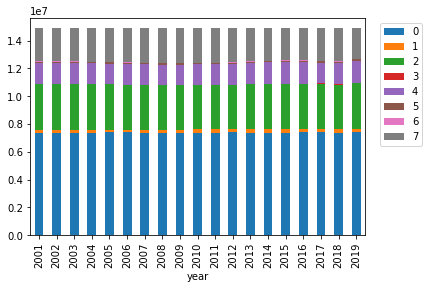

In [6]:
a = pd.crosstab(appended_data["year"],appended_data["value"])
ax = a.plot(kind = 'bar',stacked=True)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

In [7]:
# Export entire raw data
# appended_data.to_stata('stata/appended_data.dta')  
# appended_data[appended_data["year"] == 2001].to_csv('csv/appended_data_2001.csv')

## appended_data_small
5: 596,700 pixels

10: 149,430 pixels

100: 1,530 pixels

In [8]:
# Filter by rows and columns 

# 1, 5, 10, 100
filter_rows_columns = 5
appended_data_small = appended_data[(appended_data["row"] % filter_rows_columns == 0) & (appended_data["col"] % filter_rows_columns == 0)]
pd.crosstab(appended_data_small["value"],appended_data_small["year"], margins=True)

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
value,,,,,,,,,,,,,,,,,,,,
0,296636,296597,296628,296659,296678,296699,296641,296591,296645,296620,296629,296702,296657,296666,296670,296754,296715,296559,297150,5636896
1,7979,7978,7743,7751,7911,7998,8169,8321,8632,8832,9003,9057,9248,9435,9405,9295,9229,9688,9941,165615
2,131277,131159,131386,131565,130730,129411,128865,128653,126997,126670,126321,126673,129091,130090,129407,130176,130920,128410,131623,2459424
3,426,421,426,462,495,518,532,507,509,534,610,660,708,740,776,861,873,790,872,11720
4,61020,60882,60727,60114,59087,59121,58519,58045,59373,59857,60242,60540,61742,61999,62839,62123,59916,61711,64162,1152019
5,3418,3422,3425,3432,3442,3446,3451,3466,3470,3478,3487,3498,3507,3522,3533,3541,3565,3583,3601,66287
6,899,909,905,940,940,931,927,934,977,1009,1050,1060,1088,1143,1218,1290,1386,1477,1546,20629
7,95045,95332,95460,95777,97417,98576,99596,100183,100097,99700,99358,98510,94659,93105,92852,92660,94096,94482,87805,1824710
All,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,11337300


In [9]:
# Limit study area

# Longitude 37-41
# Latitude 35-39
# Syria-Turkey Border (31,684 pixels)
# appended_data_small = appended_data_small[(appended_data_small["x"].between(37,41)) & (appended_data_small["y"].between(35,39))]

# Syria-Turkey Border
# appended_data_small = appended_data_small[(appended_data_small["x"].between(35,43)) & (appended_data_small["y"].between(35,38.5))]

# Syria
# appended_data_small = appended_data[( appended_data["x"].between( 34.99549343466923 , 43.28370042350588 )) & ( appended_data["y"].between( 31.67621845984759 , 38.1677948804452 ))]

# Turkey
#appended_data_small = appended_data[( appended_data["x"].between( 25.56318295141425 , 45.52948863380468 )) & ( appended_data["y"].between( 35.26947959632568 , 42.65937130104281 ))]

# Iraq
# appended_data_small = appended_data[( appended_data["x"].between( 38.13959692908755 , 49.122749770282766 )) & ( appended_data["y"].between( 28.082957323369506 , 38.1677948804452 ))]

# Lebanon
# appended_data_small = appended_data[( appended_data["x"].between( 34.54633579260947 , 37.44465107672899 )) & ( appended_data["y"].between( 32.574533743967116 , 35.472849028086635 ))]

pd.crosstab(appended_data_small["value"],appended_data_small["year"], margins=True)

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
value,,,,,,,,,,,,,,,,,,,,
0,296636,296597,296628,296659,296678,296699,296641,296591,296645,296620,296629,296702,296657,296666,296670,296754,296715,296559,297150,5636896
1,7979,7978,7743,7751,7911,7998,8169,8321,8632,8832,9003,9057,9248,9435,9405,9295,9229,9688,9941,165615
2,131277,131159,131386,131565,130730,129411,128865,128653,126997,126670,126321,126673,129091,130090,129407,130176,130920,128410,131623,2459424
3,426,421,426,462,495,518,532,507,509,534,610,660,708,740,776,861,873,790,872,11720
4,61020,60882,60727,60114,59087,59121,58519,58045,59373,59857,60242,60540,61742,61999,62839,62123,59916,61711,64162,1152019
5,3418,3422,3425,3432,3442,3446,3451,3466,3470,3478,3487,3498,3507,3522,3533,3541,3565,3583,3601,66287
6,899,909,905,940,940,931,927,934,977,1009,1050,1060,1088,1143,1218,1290,1386,1477,1546,20629
7,95045,95332,95460,95777,97417,98576,99596,100183,100097,99700,99358,98510,94659,93105,92852,92660,94096,94482,87805,1824710
All,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,596700,11337300


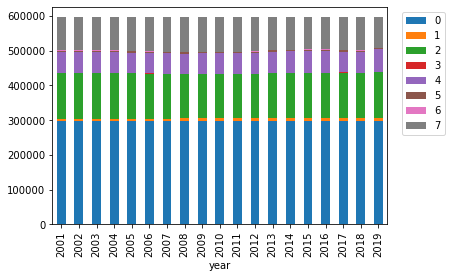

In [10]:
# Mostly desert, grass and croplands
b = pd.crosstab(appended_data_small["year"],appended_data_small["value"])
ax = b.plot(kind = 'bar',stacked=True)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

In [11]:
# appended_data_small.to_stata('stata/appended_data_small.dta')  

In [12]:
# appended_data_small[appended_data_small["year"] == 2001].to_csv('csv/appended_data_small_2001.csv')

# Example Usage: GeoPandas
## Points

/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


596700 points in appended_data_small from 2017
crs:
epsg:22770
head:
0     POINT (25.66487 42.10853)
5     POINT (25.68733 42.10853)
10    POINT (25.70978 42.10853)
15    POINT (25.73224 42.10853)
20    POINT (25.75470 42.10853)
Name: geometry, dtype: geometry


<AxesSubplot:>

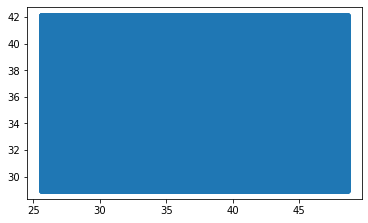

In [68]:
rectangle = appended_data_small[appended_data_small["year"] == 2017]
points = gpd.GeoDataFrame(rectangle, geometry=gpd.points_from_xy(rectangle.x, rectangle.y), crs={'init':'epsg:22770'})
# points2 = gpd.GeoDataFrame(rectangle, geometry=gpd.points_from_xy(rectangle.x, rectangle.y), crs={'init':'epsg:22770'})

# points.to_crs(epsg=4326, inplace=True)
points.to_crs(epsg=22770, inplace=True)

print(len(points), 'points in appended_data_small from 2017')
print('crs:')
print(points.crs)
# print(points2.crs)

print('head:')
print(points['geometry'].head())
# print('points2:')
# print(points2['geometry'].head())
points.plot()

epsg_code = 22770
points2.crs = pycrs.parser.from_epsg_code(epsg_code).to_proj4()
points2.crs

## Polygons

In [69]:
districts = 'shapes/DistritosNew.shp'
governorates = 'shapes/Governorates.shp'
countries = 'shapes/Countries.shp'
turkey = 'shapes/Turkey.shp'
border_turkey_syria = 'shapes/border_proj.shp'
gROADS = 'shapes/roads_dissolved.shp'
worldpop = 'shapes/worldpop_2017.shp'
# https://www.worldpop.org/geodata/summary?id=49241

In [71]:
# points = gpd.read_file(poi)
# lines = gpd.read_file(lin)
polygons = gpd.read_file(districts)
g_borders= gpd.read_file(governorates).boundary
c_borders = gpd.read_file(countries).boundary

roads = gpd.read_file(gROADS)
worldpop_2017 = gpd.read_file(worldpop)

turkey_borders = gpd.read_file(border_turkey_syria)
# turkey_borders.to_crs(epsg=4326) #inplace=True

#turkey_borders2 = gpd.read_file(turkey).boundary
#turkey_borders2.crs = 'epsg:22770'
#turkey_borders2.to_crs(epsg=22770) #inplace=True

# roads.to_crs(epsg=4326) #inplace=True
# roads.info()

In [72]:
# Replace Al Ḥasakah for Al Hasakah
polygons["NAME_1"]= polygons["NAME_1"].replace("Al Ḥasakah", "Al Hasakah")
polygons["NAME_1"]= polygons["NAME_1"].str.replace('Ḥ','H')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('Ḥ','H')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('ı','i')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('ı','i')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('İ','I')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('İ','I')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('ğ','g')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('ğ','g')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('ş','s')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('ş','s')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('Ş','S')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('Ş','S')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('ü','u')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('ü','u')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('Ü','U')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('Ü','U')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('ö','o')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('ö','o')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('Ö','O')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('Ö','O')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('Ç','C')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('Ç','C')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('ç','c')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('ç','c')
polygons["NAME_1"]= polygons["NAME_1"].str.replace('`','')
polygons["NAME_2"]= polygons["NAME_2"].str.replace('`','')
polygons["NAME_1"]= polygons["NAME_1"].str.replace("'",'')
polygons["NAME_2"]= polygons["NAME_2"].str.replace("'",'')

# polygons[(polygons['NAME_0']=='Turkey')|(polygons['NAME_0']=='Syria')|(polygons['NAME_0']=='Iraq')]['NAME_2'].value_counts()

In [73]:
points = points.merge(worldpop_2017, how='left', left_on=['geometry'], right_on=['geometry'])
points.rename(columns={'Turkey_Syr': 'worldpop2017'}, inplace=True)
points.head()
# Instructions: https://www.qgistutorials.com/en/docs/sampling_raster_data.html

,row,col,value,x,y,year,geometry,worldpop2017
0,0,0,0,25.664868,42.108529,2017,POINT (25.66487 42.10853),NaN
1,0,5,0,25.687326,42.108529,2017,POINT (25.68733 42.10853),NaN
2,0,10,0,25.709783,42.108529,2017,POINT (25.70978 42.10853),NaN
3,0,15,0,25.732241,42.108529,2017,POINT (25.73224 42.10853),NaN
4,0,20,0,25.754699,42.108529,2017,POINT (25.75470 42.10853),NaN


<AxesSubplot:>

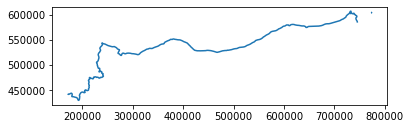

In [74]:
# roads.plot()
turkey_borders.plot()

## Map

In [75]:
points.describe()

,row,col,value,x,y,year,worldpop2017
count,596700.000000,596700.000000,596700.000000,596700.000000,596700.000000,596700.0,31684.000000
mean,1460.000000,2547.500000,2.007986,37.107159,35.550827,2017.0,91.026893
std,844.374243,1472.243713,2.537883,6.612695,3.792571,0.0,558.091419
min,0.000000,0.000000,0.000000,25.664868,28.993126,2017.0,0.000000
25%,730.000000,1273.750000,0.000000,31.386013,32.271977,2017.0,6.759885
50%,1460.000000,2547.500000,1.000000,37.107159,35.550827,2017.0,15.489950
75%,2190.000000,3821.250000,4.000000,42.828304,38.829678,2017.0,37.499160
max,2920.000000,5095.000000,7.000000,48.549450,42.108529,2017.0,30463.695310


<AxesSubplot:>

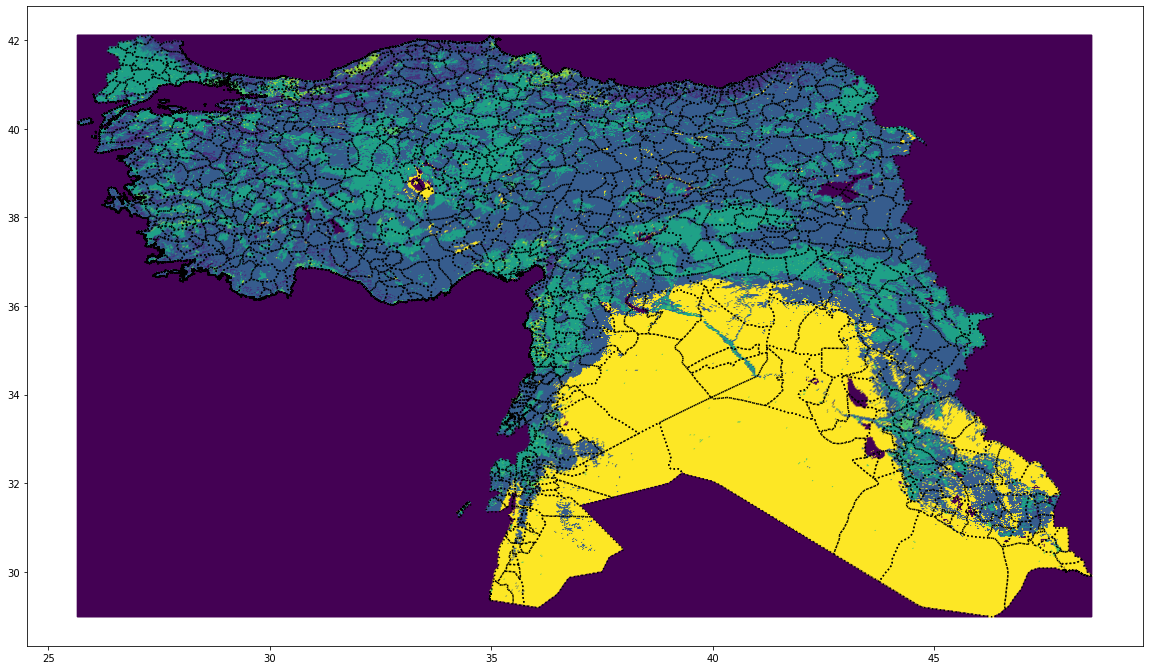

In [76]:
# Define a base map with county boundaries
ax = polygons.boundary.plot(figsize=(20,20), color=None, linestyle=':', edgecolor='black', zorder=2) #column=polygons["NAME_0"]
points.plot(column=points["value"], markersize=1, ax=ax, zorder=1)

In [77]:
# EPSG:4326
print(polygons.crs)
print(roads.crs)

print("crs={'init':'epsg:4326'}")
print(points.crs)
print(turkey_borders.crs)

print("crs={'init':'epsg:22770'}")
#print(points2.crs)
#print(turkey_borders2.crs)

print(points['geometry'].head())
#print(points2['geometry'].head())

epsg:4326
epsg:4326
crs={'init':'epsg:4326'}
epsg:22770
epsg:22770
crs={'init':'epsg:22770'}
0    POINT (25.66487 42.10853)
1    POINT (25.68733 42.10853)
2    POINT (25.70978 42.10853)
3    POINT (25.73224 42.10853)
4    POINT (25.75470 42.10853)
Name: geometry, dtype: geometry


In [78]:
# polygons.area

In [79]:
print(points.crs)
# print(points2.crs)
print(turkey_borders.crs)
# print(turkey_borders2.crs)

epsg:22770
epsg:22770


In [80]:
points['Distance'] = points.distance(turkey_borders.geometry[0]) #

In [81]:
# points['Distance2'] = points2.distance(turkey_borders2.geometry[0])

In [82]:
turkey_borders

,Id,geometry
0,0,"LINESTRING (774608.067 605008.161, 773980.271 ..."
1,0,"LINESTRING (171139.794 442900.708, 171189.775 ..."


In [83]:
points.describe()

,row,col,value,x,y,year,worldpop2017,Distance
count,596700.000000,596700.000000,596700.000000,596700.000000,596700.000000,596700.0,31684.000000,596700.000000
mean,1460.000000,2547.500000,2.007986,37.107159,35.550827,2017.0,91.026893,980043.881828
std,844.374243,1472.243713,2.537883,6.612695,3.792571,0.0,558.091419,5.710759
min,0.000000,0.000000,0.000000,25.664868,28.993126,2017.0,0.000000,980030.827344
25%,730.000000,1273.750000,0.000000,31.386013,32.271977,2017.0,6.759885,980039.368147
50%,1460.000000,2547.500000,1.000000,37.107159,35.550827,2017.0,15.489950,980043.881835
75%,2190.000000,3821.250000,4.000000,42.828304,38.829678,2017.0,37.499160,980048.395532
max,2920.000000,5095.000000,7.000000,48.549450,42.108529,2017.0,30463.695310,980056.936290


In [84]:
type(points)

geopandas.geodataframe.GeoDataFrame

In [85]:
points.columns

Index(['row', 'col', 'value', 'x', 'y', 'year', 'geometry', 'worldpop2017',
       'Distance'],
      dtype='object')

In [86]:
print(points['geometry'].head())

0    POINT (25.66487 42.10853)
1    POINT (25.68733 42.10853)
2    POINT (25.70978 42.10853)
3    POINT (25.73224 42.10853)
4    POINT (25.75470 42.10853)
Name: geometry, dtype: geometry


In [87]:
# print(points2['geometry'].head())

In [88]:
NEAR_DIST = pd.read_csv('csv/NEAR_DIST.csv')
NEAR_DIST = NEAR_DIST[["row","col","NEAR_DIST"]]
NEAR_DIST.describe()

,row,col,NEAR_DIST
count,31684.00000,31684.00000,31684.000000
mean,1137.50000,2967.50000,104126.382699
std,256.92087,256.92087,62610.473321
min,695.00000,2525.00000,0.200946
25%,915.00000,2745.00000,50581.406958
50%,1137.50000,2967.50000,101638.372808
75%,1360.00000,3190.00000,154473.736587
max,1580.00000,3410.00000,244215.990591


In [89]:
points = points.merge(NEAR_DIST, how='left', left_on=['row','col'], right_on=['row','col'])
points.describe()

,row,col,value,x,y,year,worldpop2017,Distance,NEAR_DIST
count,596700.000000,596700.000000,596700.000000,596700.000000,596700.000000,596700.0,31684.000000,596700.000000,31684.000000
mean,1460.000000,2547.500000,2.007986,37.107159,35.550827,2017.0,91.026893,980043.881828,104126.382699
std,844.374243,1472.243713,2.537883,6.612695,3.792571,0.0,558.091419,5.710759,62610.473321
min,0.000000,0.000000,0.000000,25.664868,28.993126,2017.0,0.000000,980030.827344,0.200946
25%,730.000000,1273.750000,0.000000,31.386013,32.271977,2017.0,6.759885,980039.368147,50581.406958
50%,1460.000000,2547.500000,1.000000,37.107159,35.550827,2017.0,15.489950,980043.881835,101638.372808
75%,2190.000000,3821.250000,4.000000,42.828304,38.829678,2017.0,37.499160,980048.395532,154473.736587
max,2920.000000,5095.000000,7.000000,48.549450,42.108529,2017.0,30463.695310,980056.936290,244215.990591


In [91]:
points.to_csv('csv/points.csv')

# Merge: geopandas.sjoin

In [88]:
# 7,320,940  pixels not matched to any shape
points_region = gpd.sjoin(points, 
                         polygons, 
                         how="left", 
                         op='within')
# points_region["Unique"].value_counts(sort=True)

In [89]:
match = points_region[['row','col','Unique','NAME_0','NAME_1','NAME_2','Distance','worldpop2017','NEAR_DIST']]

In [90]:
appended_data_merged = appended_data_small.merge(match, left_on=['row','col'], right_on=['row','col'])

In [98]:
appended_data_merged['id'] = appended_data_merged.groupby(['row','col']).ngroup()
appended_data_merged.to_stata('stata/longFull.dta')  

In [91]:
# Change sign for distance (negative for Syria, positive for Turkey)
appended_data_merged.loc[appended_data_merged["NAME_0"] == "Syria", "Distance"] = - appended_data_merged.loc[appended_data_merged["NAME_0"] == "Syria", "Distance"]
appended_data_merged.loc[appended_data_merged["NAME_0"] == "Syria", "NEAR_DIST"] = - appended_data_merged.loc[appended_data_merged["NAME_0"] == "Syria", "NEAR_DIST"]

In [95]:
# Create area of interest
# Area of interest: 16,860 pixels
# Longitude 37-41
# Latitude 35-39

area_of_interest = appended_data_merged[(appended_data_merged["NAME_0"] == "Turkey") | (appended_data_merged["NAME_0"] == "Syria")]  # | (appended_data_merged["NAME_0"] == "Iraq")
area_of_interest = area_of_interest[(area_of_interest["Distance"].abs() <= 1) & (area_of_interest["x"].between(37,41)) & (area_of_interest["y"].between(35,39))]
area_of_interest["bins"] = pd.cut(x=area_of_interest['Distance'], bins=[-1,-.75,-.5,-.25,0,.25,.5,.75, 1])
area_of_interest["x_cat"] = area_of_interest['x'].apply(np.floor).astype(str)
area_of_interest["y_cat"] = area_of_interest['y'].apply(np.floor).astype(str)

# area_of_interest["Land Use Type"] = area_of_interest[["value"]].astype(str)
cleanup_nums = {"0": 'Water', 
                "1": 'Forest', 
                "2": 'Grass', 
                "3": 'Wetlands', 
                "4": 'Croplands', 
                "5": 'Urban', 
                "6": 'Mosaics', 
                "7": 'Barren'}
area_of_interest["Land Use Type"].replace(cleanup_nums, inplace=True)

ax = pd.crosstab(area_of_interest["year"],area_of_interest["value"]).plot(kind = 'bar',stacked=True)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

MemoryError: Unable to allocate 310. TiB for an array with shape (11337300, 3757022) and data type float64

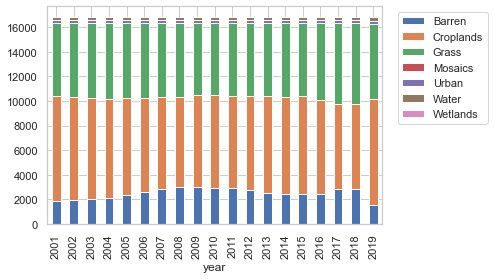

In [125]:
ax = pd.crosstab(area_of_interest["year"],area_of_interest["Land Use Type"]).plot(kind = 'bar',stacked=True)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

In [126]:
area_of_interest["Land Use Type"].value_counts()

Croplands    147960
Grass        116031
Barren        46982
Water          4544
Urban          4505
Wetlands        317
Mosaics           1
Name: Land Use Type, dtype: int64

In [127]:
area_of_interest["value"].value_counts()

4    147960
2    116031
7     46982
0      4544
5      4505
3       317
6         1
Name: value, dtype: int64

In [128]:
# Page 54
area_of_interest["bins"].value_counts()

(-0.5, -0.25]    40736
(-0.75, -0.5]    40641
(-1.0, -0.75]    40451
(-0.25, 0.0]     40147
(0.0, 0.25]      40071
(0.25, 0.5]      39596
(0.5, 0.75]      39482
(0.75, 1.0]      39216
Name: bins, dtype: int64

In [129]:
area_of_interest.describe()

,row,col,value,x,y,year,Unique,Distance,worldpop2017,NEAR_DIST
count,320340.000000,320340.000000,320340.000000,320340.000000,320340.000000,320340.000000,320340.000000,320340.000000,320340.000000,320340.000000
mean,1183.034401,2961.630190,3.671905,38.967256,36.794840,2010.000000,512.201423,-0.006774,130.378905,-491.581634
std,140.988073,259.716222,1.703878,1.166535,0.633259,5.477234,358.203929,0.576513,709.672155,62399.321545
min,890.000000,2525.000000,0.000000,37.006098,35.236417,2001.000000,201.000000,-0.999946,0.000000,-110603.327078
25%,1065.000000,2735.000000,2.000000,37.949329,36.269480,2005.000000,210.000000,-0.505491,11.922005,-54329.335263
50%,1180.000000,2960.000000,4.000000,38.959934,36.808469,2010.000000,241.000000,-0.009967,23.870380,-1067.773974
75%,1300.000000,3190.000000,4.000000,39.992996,37.325000,2015.000000,932.000000,0.491598,57.760008,53244.868832
max,1530.000000,3410.000000,7.000000,40.981143,38.111026,2019.000000,1057.000000,0.999936,30463.695310,110844.391594


In [130]:
#320340
pd.crosstab(area_of_interest["value"],area_of_interest["year"], margins=True)

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
value,,,,,,,,,,,,,,,,,,,,
0,238,240,240,240,237,236,234,233,233,235,237,237,237,233,232,229,221,214,338,4544
2,6011,6090,6140,6182,6157,6101,6030,6070,5866,5850,5935,5978,5987,6063,5987,6260,6655,6595,6074,116031
3,14,14,14,14,15,14,15,15,17,18,22,22,21,20,20,19,19,16,8,317
4,8469,8333,8252,8126,7898,7699,7528,7324,7524,7598,7548,7665,7883,7872,7982,7687,6930,6954,8688,147960
5,232,233,233,233,234,234,234,236,236,236,237,238,238,240,240,241,242,243,245,4505
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7,1896,1950,1981,2065,2319,2576,2819,2982,2984,2923,2881,2720,2494,2432,2399,2423,2793,2838,1507,46982
All,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,16860,320340


<AxesSubplot:>

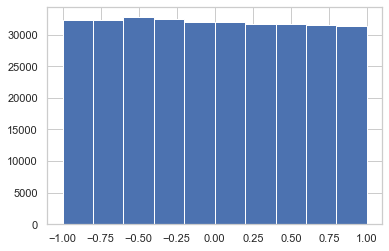

In [131]:
area_of_interest["Distance"].hist()

## Syria vs Turkey

Turkey = area_of_interest[area_of_interest["NAME_0"] == "Turkey"]
Syria = area_of_interest[area_of_interest["NAME_0"] == "Syria"]

## Syria buffer

pd.crosstab(Syria["value"],Syria["year"], margins=True)

b = pd.crosstab(Syria["year"],Syria["value"])
ax = b.plot(kind = 'bar',stacked=True)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

## Turkey buffer

pd.crosstab(Turkey["value"],Turkey["year"], margins=True)

b = pd.crosstab(Turkey["year"],Turkey["value"])
ax = b.plot(kind = 'bar',stacked=True)
horiz_offset = 1.03
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

# Maps

In [132]:
subset = area_of_interest[area_of_interest["year"] == 2017]
subset.to_csv('csv/area_of_interest.csv')
points2 = gpd.GeoDataFrame(subset, geometry=gpd.points_from_xy(subset.x, subset.y))
points2.crs = {'init': 'epsg:4326'} # {'init': 'EPSG:4326', 'no_defs': True}

/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


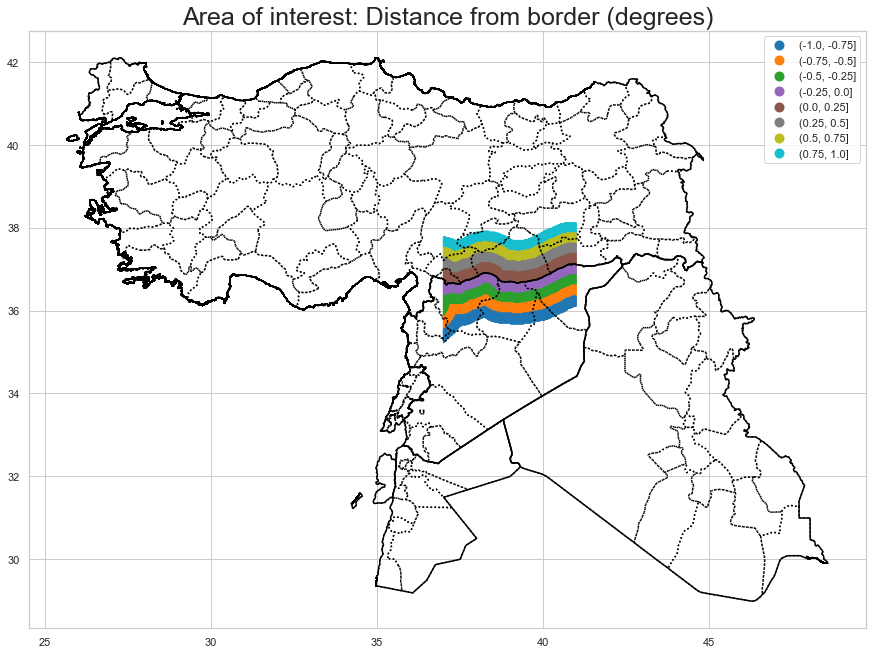

In [133]:
fig, ax = plt.subplots(1, figsize=(15,15))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["bins"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Distance from border (degrees)', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export1.png", dpi=300)

fig, ax = plt.subplots(1, figsize=(15,15))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["NAME_1"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Governorates', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export2.png", dpi=300)

fig, ax = plt.subplots(1, figsize=(15,15))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["x_cat"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Longitude', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export3.png", dpi=300)

fig, ax = plt.subplots(1, figsize=(15,15))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["y_cat"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Latitude', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export4.png", dpi=300)

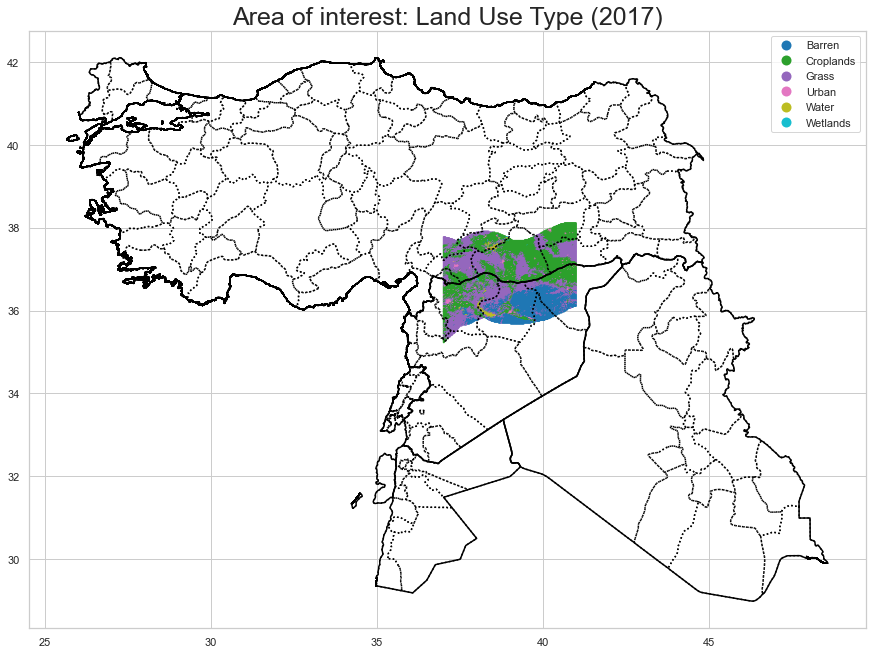

In [134]:
fig, ax = plt.subplots(1, figsize=(15,15))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["Land Use Type"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Land Use Type (2017)', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export5.png", dpi=300)

fig, ax = plt.subplots(1, figsize=(15,15))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["NAME_0"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Side of border', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export6.png", dpi=300)

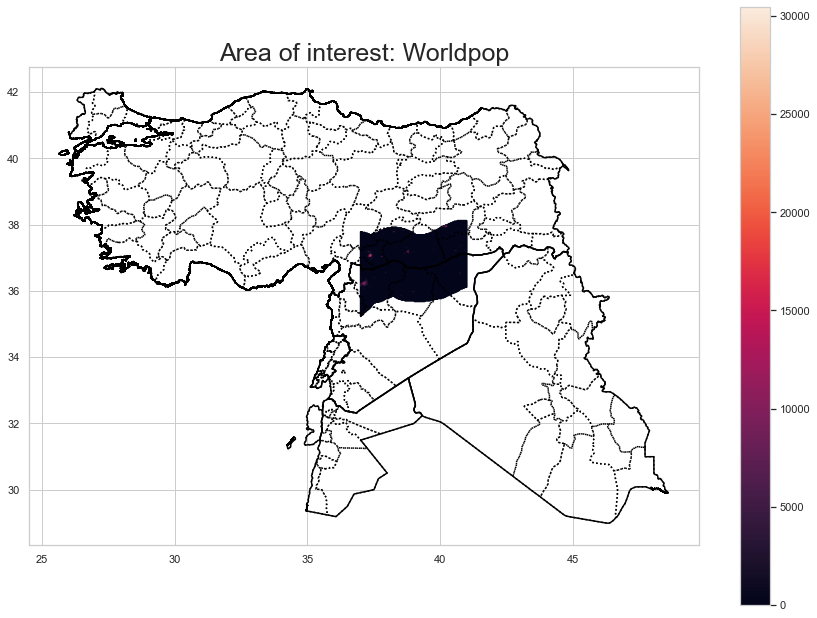

In [135]:
fig, ax = plt.subplots(1, figsize=(15,11))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["worldpop2017"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Worldpop', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export7.png", dpi=300)

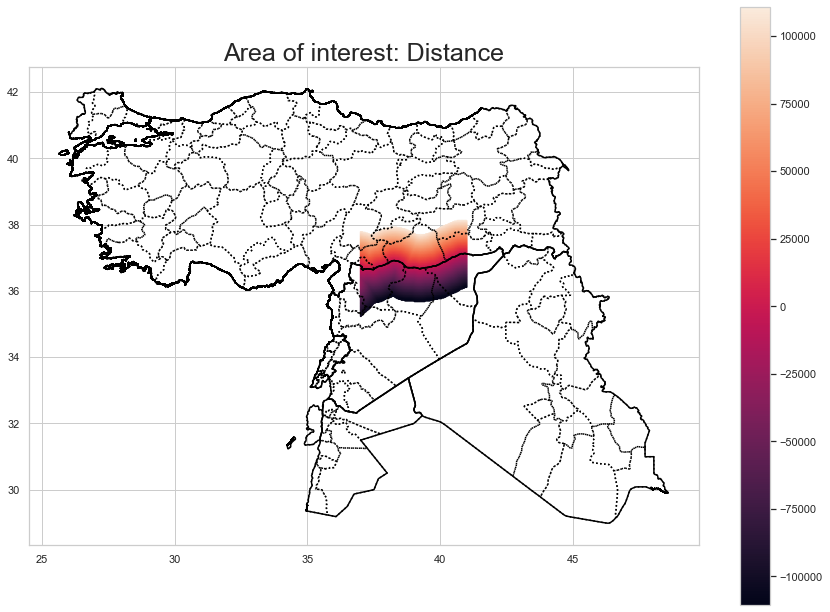

In [136]:
fig, ax = plt.subplots(1, figsize=(15,11))
g_borders.plot(color=None, linestyle=':', edgecolor='black', zorder=2, ax=ax)
c_borders.plot(color=None, edgecolor='black', zorder=2, ax=ax)
points2.plot(column=points2["NEAR_DIST"],markersize=1, ax=ax, zorder=1, legend=True)
ax.set_title('Area of interest: Distance', fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.savefig("images/map_export8.png", dpi=300)

In [137]:
delta = 0
print('appended_data_small = appended_data[( appended_data["x"].between(',area_of_interest.x.min()-delta,',',area_of_interest.x.max()+delta,'))', '&','( appended_data["y"].between(',area_of_interest.y.min()-delta,',',area_of_interest.y.max()+delta,'))]')

appended_data_small = appended_data[( appended_data["x"].between( 37.00609812930369 , 40.98114326153257 )) & ( appended_data["y"].between( 35.23641701958823 , 38.1110259287707 ))]


In [138]:
area_of_interest.dtypes

row                 int64
col                 int64
value               uint8
x                 float64
y                 float64
year                int64
Unique              int64
NAME_0             object
NAME_1             object
NAME_2             object
Distance          float64
worldpop2017      float64
NEAR_DIST         float64
bins             category
x_cat              object
y_cat              object
Land Use Type      object
dtype: object

In [139]:
#pd.set_option('display.max_rows', None)
area_of_interest["NAME_0"].value_counts()

Syria     161975
Turkey    158365
Name: NAME_0, dtype: int64

# Export Long and Wide

In [140]:
#16860*19
pd.set_option('display.max_columns', None)
area_of_interest['id'] = area_of_interest.groupby(['row','col']).ngroup()
area_of_interest.to_stata('stata/long.dta')  

wide=area_of_interest.pivot(index='id', columns='year')
wide.to_stata('stata/wide.dta') 
wide.describe()

/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/pandas/io/stata.py:2398: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Land Use Type   ->   Land_Use_Type

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)
/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/pandas/io/stata.py:648: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column bins contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  warnings.warn(
/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/pandas/io/stata.py:2398: InvalidColumnName: 

row                                                          \
year           2001          2002          2003          2004          2005   
count  16860.000000  16860.000000  16860.000000  16860.000000  16860.000000   
mean    1183.034401   1183.034401   1183.034401   1183.034401   1183.034401   
std      140.992034    140.992034    140.992034    140.992034    140.992034   
min      890.000000    890.000000    890.000000    890.000000    890.000000   
25%     1065.000000   1065.000000   1065.000000   1065.000000   1065.000000   
50%     1180.000000   1180.000000   1180.000000   1180.000000   1180.000000   
75%     1300.000000   1300.000000   1300.000000   1300.000000   1300.000000   
max     1530.000000   1530.000000   1530.000000   1530.000000   1530.000000   

                                                                             \
year           2006          2007          2008          2009          2010   
count  16860.000000  16860.000000  16860.000000  16860.000000  16860.000000   
mean    1183.034401   1183.034401   1183.034401   1183.034401   1183.034401   
std      140.992034    140.992034    140.992034    140.992034    140.992034   
min      890.000000    890.000000    890.000000    890.000000    890.000000   
25%     1065.000000   1065.000000   1065.000000   1065.000000   1065.000000   
50%     1180.000000   1180.000000   1180.000000   1180.000000   1180.000000   
75%     1300.000000   1300.000000   1300.000000   1300.000000   1300.000000   
max     1530.000000   1530.000000   1530.000000   1530.000000   1530.000000   

                                                                             \
year           2011          2012          2013          2014          2015   
count  16860.000000  16860.000000  16860.000000  16860.000000  16860.000000   
mean    1183.034401   1183.034401   1183.034401   1183.034401   1183.034401   
std      140.992034    140.992034    140.992034    140.992034    140.992034   
min      890.000000    890.000000    890.000000    890.000000    890.000000   
25%     1065.000000   1065.000000   1065.000000   1065.000000   1065.000000   
50%     1180.000000   1180.000000   1180.000000   1180.000000   1180.000000   
75%     1300.000000   1300.000000   1300.000000   1300.000000   1300.000000   
max     1530.000000   1530.000000   1530.000000   1530.000000   1530.000000   

                                                                        col  \
year           2016          2017          2018          2019          2001   
count  16860.000000  16860.000000  16860.000000  16860.000000  16860.000000   
mean    1183.034401   1183.034401   1183.034401   1183.034401   2961.630190   
std      140.992034    140.992034    140.992034    140.992034    259.723519   
min      890.000000    890.000000    890.000000    890.000000   2525.000000   
25%     1065.000000   1065.000000   1065.000000   1065.000000   2735.000000   
50%     1180.000000   1180.000000   1180.000000   1180.000000   2960.000000   
75%     1300.000000   1300.000000   1300.000000   1300.000000   3190.000000   
max     1530.000000   1530.000000   1530.000000   1530.000000   3410.000000   

                                                                             \
year           2002          2003          2004          2005          2006   
count  16860.000000  16860.000000  16860.000000  16860.000000  16860.000000   
mean    2961.630190   2961.630190   2961.630190   2961.630190   2961.630190   
std      259.723519    259.723519    259.723519    259.723519    259.723519   
min     2525.000000   2525.000000   2525.000000   2525.000000   2525.000000   
25%     2735.000000   2735.000000   2735.000000   2735.000000   2735.000000   
50%     2960.000000   2960.000000   2960.000000   2960.000000   2960.000000   
75%     3190.000000   3190.000000   3190.000000   3190.000000   3190.000000   
max     3410.000000   3410.000000   3410.000000   3410.000000   3410.000000   

                                                             

## xtregresults.csv

In [141]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
df = pd.read_csv("csv/xtregresults.csv")

In [142]:
xtreg_re = df[(df["regression"]=="xtreg cropland bins years") & (df["model"]=="re")]
xtreg_fe = df[(df["regression"]=="xtreg cropland bins years") & (df["model"]=="fe")]
xtlogit_re = df[(df["regression"]=="xtlogit cropland bins years") & (df["model"]=="re")]
xtlogit_fe = df[(df["regression"]=="xtlogit cropland bins years") & (df["model"]=="fe")]

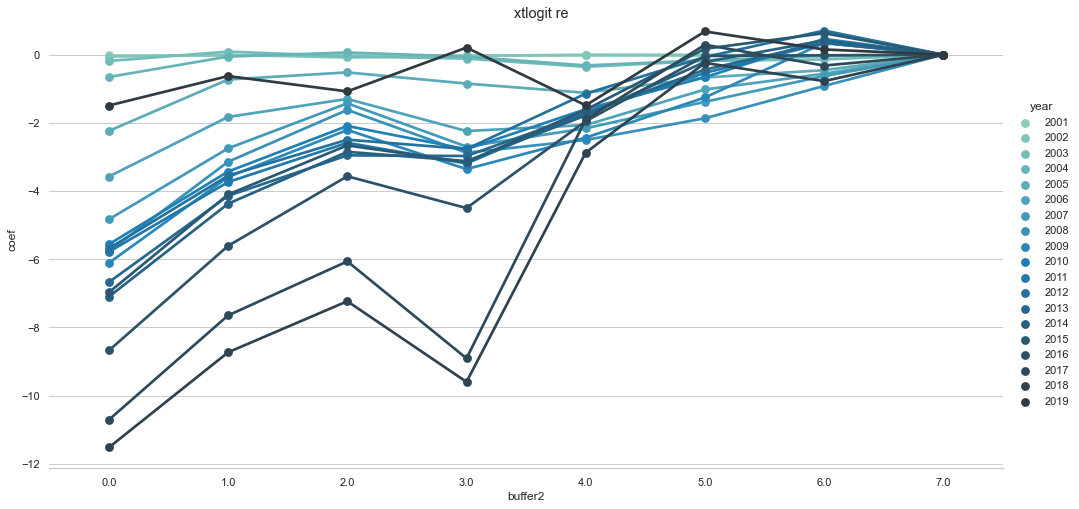

In [143]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="buffer2", y="coef", hue="year",
                capsize=.2, palette="YlGnBu_d", height=7, aspect=2,
                kind="point", data=xtlogit_re)
g.fig.suptitle("xtlogit re")
g.despine(left=True)
g.savefig("images/Interactions_xtlogit_re.png", dpi=300)

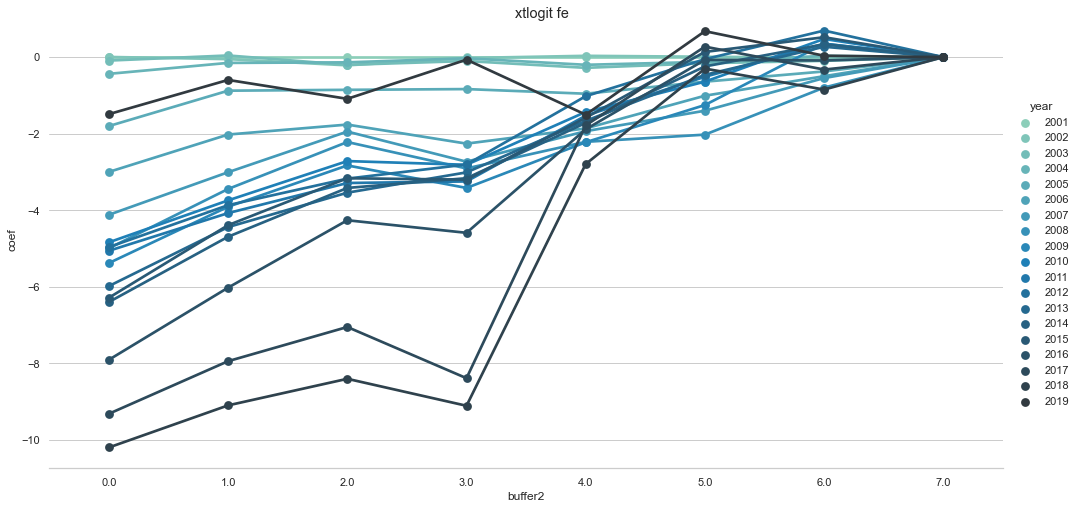

In [144]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="buffer2", y="coef", hue="year",
                capsize=.2, palette="YlGnBu_d", height=7, aspect=2,
                kind="point", data=xtlogit_fe)
g.fig.suptitle("xtlogit fe")
g.despine(left=True)
g.savefig("images/Interactions_xtlogit_fe.png", dpi=300)

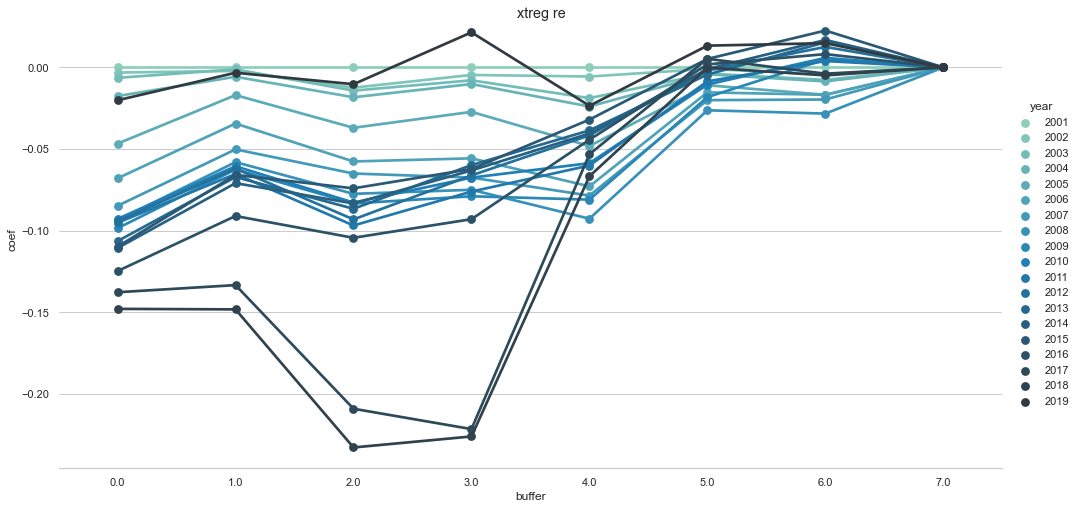

In [145]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="buffer", y="coef", hue="year",
                capsize=.2, palette="YlGnBu_d", height=7, aspect=2,
                kind="point", data=xtreg_re)
g.fig.suptitle("xtreg re")
g.despine(left=True)
g.savefig("images/Interactions_xtreg_re.png", dpi=300)

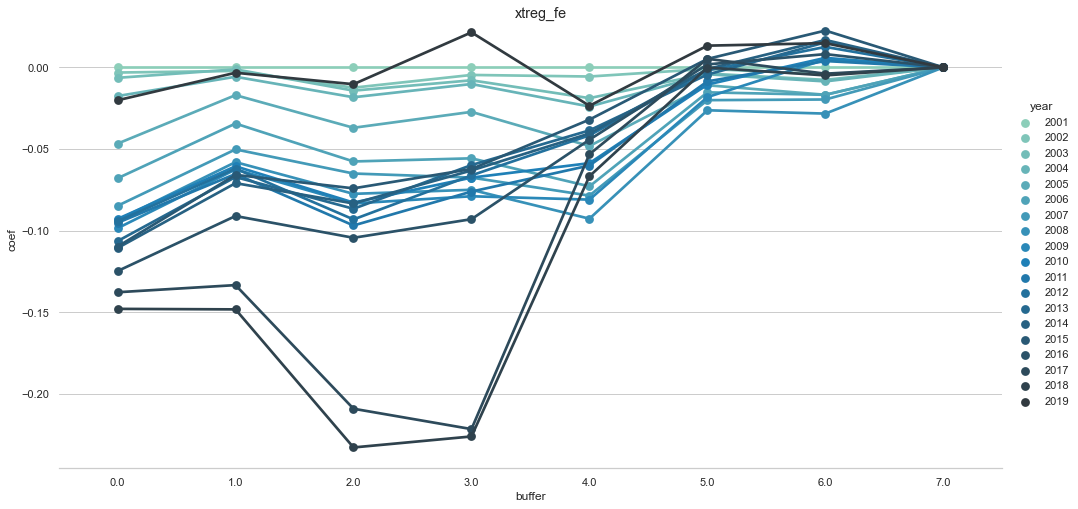

In [146]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="buffer", y="coef", hue="year",
                capsize=.2, palette="YlGnBu_d", height=7, aspect=2,
                kind="point", data=xtreg_fe)
g.fig.suptitle("xtreg_fe")
g.despine(left=True)
g.savefig("images/Interactions_xtreg_fe.png", dpi=300)

# sklearn

| Label |         Land Use Type        |
|:-----:|:----------------------------:|
|   0   |         Water Bodies         |
|   1   |            Forests           |
|   2   |     Shrub and grasslands     |
|   3   |           Wetlands           |
|   4   |           Croplands          |
|   5   |             Urban            |
|   6   | Cropland/Natural Veg Mosaics |
|   7   |      Non-Vegetated Lands     |

In [75]:
area_of_interest["value"].value_counts()

4    147960
2    116031
7     46982
0      4544
5      4505
3       317
6         1
Name: value, dtype: int64

In [76]:
# https://pbpython.com/categorical-encoding.html
landUseTypes=area_of_interest[["value"]].astype(str)
cleanup_nums = {"value":     {"0": 'Water', 
                              "1": 'Forest', 
                              "2": 'Grass', 
                              "3": 'Wetlands', 
                              "4": 'Croplands', 
                              "5": 'Urban', 
                              "6": 'Mosaics', 
                              "7": 'Barren', 
                             }}
landUseTypes.replace(cleanup_nums, inplace=True)
landUseTypes.value_counts()

value    
Croplands    147960
Grass        116031
Barren        46982
Water          4544
Urban          4505
Wetlands        317
Mosaics           1
dtype: int64

In [77]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
landUseTypes_encoded = ordinal_encoder.fit_transform(landUseTypes)
landUseTypes_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [80]:
ordinal_encoder.categories_

[array(['Barren', 'Croplands', 'Grass', 'Mosaics', 'Urban', 'Water',
        'Wetlands'], dtype=object)]

In [81]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(landUseTypes)
housing_cat_1hot.toarray()[:10]

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [82]:
cat_encoder.categories_

[array(['Barren', 'Croplands', 'Grass', 'Mosaics', 'Urban', 'Water',
        'Wetlands'], dtype=object)]

# Google Earth Engine

In [83]:
band = 'LC_Type2' # 'LC_Type1' 'LC_Type2'

# Syrian border
# Just for aesthetics in map
LSIB = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")
SY = LSIB.filterMetadata('country_co', 'equals', 'SY')
TU = LSIB.filterMetadata('country_co', 'equals', 'TU')
IZ = LSIB.filterMetadata('country_co', 'equals', 'IZ')
LE = LSIB.filterMetadata('country_co', 'equals', 'LE')
JO = LSIB.filterMetadata('country_co', 'equals', 'JO')
IS = LSIB.filterMetadata('country_co', 'equals', 'IS')
WE = LSIB.filterMetadata('country_co', 'equals', 'WE')
roi = SY.merge(TU).merge(IZ).merge(LE).merge(JO).merge(IS).merge(WE)
roi = LSIB

# 2009 vs 2017
MOD6_2009 = ee.Image('MODIS/006/MCD12Q1/2009_01_01').select(band).clip(roi).remap([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [0,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1])
MOD6_2017 = ee.Image('MODIS/006/MCD12Q1/2017_01_01').select(band).clip(roi).remap([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [0,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1])


In [9]:
geometry = ee.Geometry.Rectangle([33, 28, 48, 39])

task_config = {
    'scale': 30,  
    'region': geometry
    }

task = ee.batch.Export.image(MOD6_2017, 'exportExample2', task_config)

task.start()

# Heatmap

m = folium.Map([35, 41],
               tiles='stamentoner',
               zoom_start=6)


hm = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()), 
                     radius=10,
                     auto_play=True,
                     max_opacity=0.8,
                     name='UCDP')
hm.add_to(m)

syria = Choropleth(geo_data=c_borders, name="Countries").add_to(m)
governorates = Choropleth(geo_data=g_borders, name="Governorates").add_to(m)
bounds = Choropleth(geo_data=polygons.boundary, name="Districts").add_to(m)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True).add_to(m)

folium.LayerControl().add_to(m)
map.save('html/index.html')
m

In [ ]:
ucdp_df = pd.read_csv('csv/ged201.csv') # download from https://ucdp.uu.se/downloads/index.html#ged_global
year_1, year_N = 1989, 2019
ucdp_df = ucdp_df.loc[ucdp_df.year.isin(range(year_1,year_N+1))]
ucdp = gpd.GeoDataFrame(ucdp_df, geometry=gpd.points_from_xy(ucdp_df.longitude, ucdp_df.latitude))
ucdp.crs = {'init': 'epsg:4326'}
heat_df = ucdp[['latitude','longitude','year']]
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df['year'] == i].iterrows()] for i in range(year_1,year_N+1)]

map = folium.Map([35, 41], tiles='stamenterrain', zoom_start=6) #stamentoner, openstreetmap

syria = Choropleth(geo_data=c_borders, name="Countries").add_to(map)
governorates = Choropleth(geo_data=g_borders, name="Governorates").add_to(map)
bounds = Choropleth(geo_data=polygons.boundary, name="Districts").add_to(map)

hm = HeatMapWithTime(heat_data,
                     index=list(range(year_1,year_N+1)), # len(heat_data) == len(index)
                     name='UCDP',
                     radius=15,
                     use_local_extrema=True,
                     auto_play=True,
                     max_opacity=0.8).add_to(map)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True).add_to(map)

folium.LayerControl().add_to(map)
map.save('html/index.html')
map

/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/javierparada/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# pixelLonLat returns an image with each pixel labeled with longitude andlatitude values.
lonLat = ee.Image.pixelLonLat()
# Select the longitude and latitude bands, multiply by a large number then truncate them to integers.
lonGrid = lonLat.select('longitude').multiply(10000000).toInt()
latGrid = lonLat.select('latitude').multiply(10000000).toInt()
# To produce the grid, multiply the latitude and longitude images and then use reduce to vectors at the 10km resolution to group the grid into vectors.
longitude = ee.Image.pixelLonLat().select('longitude')
utmZones = longitude.add(180).divide(6).int()

grid = lonGrid.multiply(latGrid)

vectors = grid.reduceToVectors(**{
  'geometry': roi,
  'scale': 1000,
  'geometryType': 'polygon',
  'eightConnected': False,
  'labelProperty': 'zone',
  'reducer': ee.Reducer.mean()
})

In [112]:
# Cropland Classification Pixel Analysis
# Compare MOD6_2010 and MOD6_2017 (remapped to 0=Other,1=Cropland)
baseline = MOD6_2009
endline = MOD6_2017
MAX_CLASSES = 3
num_combined_classes = MAX_CLASSES*MAX_CLASSES
combined = baseline.multiply(MAX_CLASSES).add(endline)

MiniPalette = [
  '0066ff', # Water --> Water --0
  '3300cc', # Water --> Other --1
  '3300ff', # Water --> Cropland --2
  '3333cc', # Other --> Water --3
  'ffffff', # Other --> Other --4
  '003300', # Other --> Cropland --5 dark green
  '3366ff', # Cropland --> Water --6
  'cc0000', # Cropland --> Other --7 red
  '00cc00', # Cropland --> Cropland --8 green
]

legend_dict = {
    '00 Water --> Water': '0066ff',
    '01 Water --> Other': '3300cc',
    '02 Water --> Cropland': '3300ff',
    '10 Other --> Water': '3333cc',
    '11 Other --> Other': 'ffffff',
    '12 Other --> Cropland': '003300', 
    '20 Cropland --> Water': '3366ff',
    '21 Cropland --> Other': 'cc0000',
    '22 Cropland --> Cropland': '00cc00',
}

legend_dict = {
    'Water --> Water': '0066ff',
    'Other --> Other': 'ffffff',
    'Other --> Cropland': '003300', 
    'Cropland --> Other': 'cc0000',
    'Cropland --> Cropland': '00cc00',
}

Map = geemap.Map()
Map.add_basemap('SATELLITE')

Map.addLayer(combined, {min:0, max:8, 'palette': MiniPalette}, 'Combined 2017 and 2009')

Map.add_legend(legend_title="Cropland 2009 --> 2017 Classification", legend_dict=legend_dict)
Map.addLayer(roi, {'color': '00000000', 'width': 3,}, "Borders")
Map.centerObject(SY,6)
Map        

Map(center=[35.01045733338177, 38.476272902728866], controls=(WidgetControl(options=['position'], widget=HBox(…

# Notes

In [128]:
points_region.to_csv('csv/points_region.csv')

In [163]:
points_region.columns

Index(['row', 'col', 'value', 'x', 'y', 'year', 'geometry', 'index_right',
       'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'Unique'],
      dtype='object')

In [168]:
points_region['Unique'].value_counts(sort=True)

7.0      464913
18.0     224290
235.0    184808
139.0    142364
27.0     133758
          ...  
165.0        32
710.0        30
182.0        10
168.0        10
156.0         8
Name: Unique, Length: 1188, dtype: int64

<AxesSubplot:>

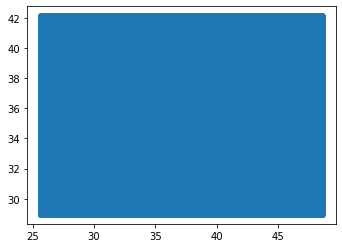

In [146]:
points_region.plot()



<AxesSubplot:>

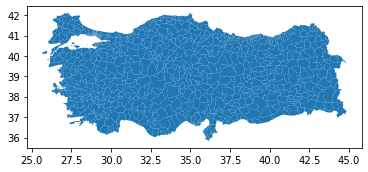

In [496]:
polygons[polygons['NAME_0'] == "Turkey"].plot()



In [176]:
pd.crosstab(points_region["NAME_1"],points_region["NAME_0"], margins=True)

NAME_0,Iraq,Jordan,Lebanon,Palestina,Syria,Turkey,All
NAME_1,,,,,,,
Adana,0,0,0,0,0,79946,79946
Adiyaman,0,0,0,0,0,37616,37616
Afyon,0,0,0,0,0,75609,75609
Agri,0,0,0,0,0,53510,53510
Ajlun,0,1939,0,0,0,0,1939
...,...,...,...,...,...,...,...
Zinguldak,0,0,0,0,0,16284,16284
Çanakkale,0,0,0,0,0,51134,51134
Çankiri,0,0,0,0,0,41818,41818


In [181]:
table = pd.pivot_table(points_region, index=['NAME_0', 'NAME_1','NAME_2','Unique','year','value'], values='geometry', aggfunc='count')
table.to_csv('csv/table.csv')

geometry
NAME_0    year value          
Iraq      2001 0         24278
               2        403331
               3          1235
               4        216847
               5         17091
               6           733
               7       1467836
Jordan    2001 0          2325
               2         31659
               4         10303
               5          3830
               6            23
               7        370250
Lebanon   2001 0           280
               1           170
               2         34801
               3            36
               4         11164
               5          2053
               6             2
               7           981
Palestina 2001 0          1083
               2         14856
               4          8658
               5          1317
               6            17
               7          3476
Syria     2001 0          4292
               1          1031
               2        179719
               3           282
               4        212426
               5         12862
               6          3994
               7        500696
Turkey    2001 0         50085
               1        195966
               2       2614836
               3          7826
               4       1066712
               5         46181
               6         17405
               7         29546

# Notes

In [22]:
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay

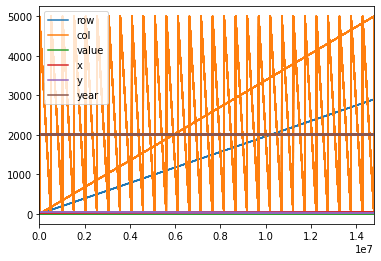

In [23]:
appended_data_small.plot()


In [25]:
appended_data_small["year"].value_counts(sort=False)

2001    149430
2002    149430
2003    149430
2004    149430
2005    149430
2006    149430
2007    149430
2008    149430
2009    149430
2010    149430
2011    149430
2012    149430
2013    149430
2014    149430
2015    149430
2016    149430
2017    149430
2018    149430
2019    149430
Name: year, dtype: int64

In [64]:
appended_data_small["row"].value_counts(sort=True)

2700    969
2300    969
400     969
800     969
1200    969
1600    969
2000    969
2400    969
2800    969
100     969
500     969
900     969
1300    969
1700    969
2100    969
2500    969
2900    969
200     969
600     969
1000    969
1400    969
1800    969
2200    969
2600    969
300     969
700     969
1100    969
1500    969
1900    969
0       969
Name: row, dtype: int64

In [65]:
appended_data_small["col"].value_counts(sort=False)

0       570
400     570
800     570
1200    570
1600    570
2000    570
2400    570
2800    570
3200    570
3600    570
4000    570
4400    570
4800    570
100     570
500     570
900     570
1300    570
1700    570
2100    570
2500    570
2900    570
3300    570
3700    570
4100    570
4500    570
4900    570
200     570
600     570
1000    570
1400    570
1800    570
2200    570
2600    570
3000    570
3400    570
3800    570
4200    570
4600    570
5000    570
300     570
700     570
1100    570
1500    570
1900    570
2300    570
2700    570
3100    570
3500    570
3900    570
4300    570
4700    570
Name: col, dtype: int64

In [68]:
appended_data_small.describe()

,row,col,value,x,y,year
count,29070.000000,29070.000000,29070.000000,29070.000000,29070.000000,29070.00000
mean,1450.000000,2500.000000,1.979601,36.893809,35.595743,2010.00000
std,865.559032,1471.985463,2.531190,6.611535,3.887725,5.47732
min,0.000000,0.000000,0.000000,25.664868,29.082957,2001.00000
25%,700.000000,1200.000000,0.000000,31.054759,32.227061,2005.00000
50%,1450.000000,2500.000000,0.000000,36.893809,35.595743,2010.00000
75%,2200.000000,3800.000000,4.000000,42.732858,38.964425,2015.00000
max,2900.000000,5000.000000,7.000000,48.122750,42.108529,2019.00000


In [70]:
type(appended_data_small)

pandas.core.frame.DataFrame

In [71]:
appended_data_small.index

Int64Index([       0,      100,      200,      300,      400,      500,
                 600,      700,      800,      900,
            ...
            14785400, 14785500, 14785600, 14785700, 14785800, 14785900,
            14786000, 14786100, 14786200, 14786300],
           dtype='int64', length=29070)

In [73]:
appended_data_small.dtypes

row        int64
col        int64
value      uint8
x        float64
y        float64
year       int64
dtype: object

In [74]:
appended_data_small.shape

(29070, 6)

In [75]:
appended_data_small.values

array([[   0.        ,    0.        ,    0.        ,   25.66486767,
          42.10852894, 2001.        ],
       [   0.        ,  100.        ,    0.        ,   26.11402531,
          42.10852894, 2001.        ],
       [   0.        ,  200.        ,    0.        ,   26.56318295,
          42.10852894, 2001.        ],
       ...,
       [2900.        , 4800.        ,    0.        ,   47.22443449,
          29.08295732, 2019.        ],
       [2900.        , 4900.        ,    0.        ,   47.67359213,
          29.08295732, 2019.        ],
       [2900.        , 5000.        ,    0.        ,   48.12274977,
          29.08295732, 2019.        ]])

In [76]:
appended_data_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29070 entries, 0 to 14786300
Data columns (total 6 columns):
row      29070 non-null int64
col      29070 non-null int64
value    29070 non-null uint8
x        29070 non-null float64
y        29070 non-null float64
year     29070 non-null int64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 1.4 MB


In [80]:
appended_data_small.groupby('year').y.mean()

year
2001    35.595743
2002    35.595743
2003    35.595743
2004    35.595743
2005    35.595743
2006    35.595743
2007    35.595743
2008    35.595743
2009    35.595743
2010    35.595743
2011    35.595743
2012    35.595743
2013    35.595743
2014    35.595743
2015    35.595743
2016    35.595743
2017    35.595743
2018    35.595743
2019    35.595743
Name: y, dtype: float64

In [78]:
appended_data_small.groupby('year').y.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2001,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2002,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2003,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2004,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2005,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2006,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2007,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2008,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529
2009,1530.0,35.595743,3.888929,29.082957,32.227061,35.595743,38.964425,42.108529


In [24]:
appended_data.head()

,row,col,value,x,y,year
0,0,0,0,25.664868,42.108529,2001
10,0,10,0,25.709783,42.108529,2001
20,0,20,0,25.754699,42.108529,2001
30,0,30,0,25.799615,42.108529,2001
40,0,40,0,25.844531,42.108529,2001


In [25]:
appended_data.tail()

,row,col,value,x,y,year
14888290,2920,5050,0,48.347329,28.993126,2019
14888300,2920,5060,0,48.392244,28.993126,2019
14888310,2920,5070,0,48.437160,28.993126,2019
14888320,2920,5080,0,48.482076,28.993126,2019
14888330,2920,5090,0,48.526992,28.993126,2019


# Notes

In [19]:
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [23]:
state_pcts

sales
state office_id           
AZ    2          16.981365
      4          19.250033
      6          63.768601
CA    1          19.331879
      3          33.858747
      5          46.809373
CO    1          36.851857
      3          19.874290
      5          43.273852
WA    2          34.707233
      4          35.511259
      6          29.781508

In [57]:
# Define a palette for the 18 distinct land cover classes:
UMDPalette = [
  '1c0dff', # water--0
  '05450a', '086a10', '54a708', '78d203', '009900', #  Forest--1
  'c6b044', 'dcd159', 'dade48', 'fbff13', 'b6ff05',  # Shrub, grass--2
  '27ff87', # Wetlands--3
  'c24f44', # Croplands--4
  'a5a5a5', # Urban--5
  'ff6d4c', # Crop mosaic--6
  'f9ffa4', # Barren--7
]

In [4]:

raster2001 = 'rasters/MODISLandCovertype2001.tif'
raster2002 = 'rasters/MODISLandCovertype2002.tif'
raster2003 = 'rasters/MODISLandCovertype2003.tif'
raster2004 = 'rasters/MODISLandCovertype2004.tif'
raster2009 = 'rasters/MODISLandCovertype2009.tif'
raster2010 = 'rasters/MODISLandCovertype2010.tif'
raster2011 = 'rasters/MODISLandCovertype2011.tif'
raster2017 = 'rasters/MODISLandCovertype2017.tif'

In [7]:
data_2001 = gr.from_file(raster2001)
data_2002 = gr.from_file(raster2002)
data_2003 = gr.from_file(raster2003)
data_2004 = gr.from_file(raster2004)
data_2009 = gr.from_file(raster2009)
data_2010 = gr.from_file(raster2010)
data_2011 = gr.from_file(raster2011)
data_2017 = gr.from_file(raster2017)

(2902, 5007)
(2902, 5007)
14530314


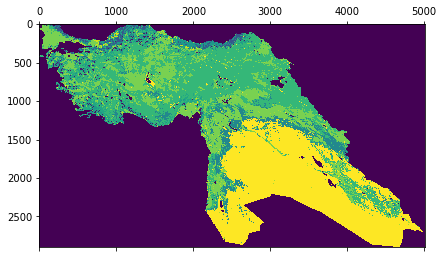

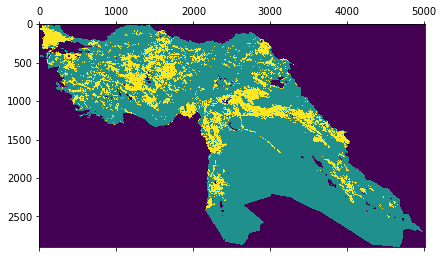

In [8]:
# Plot data: 14,530,314 pixels
data_2009.plot()
data_2017.plot()
print(data_2009.shape)
print(data_2017.shape)
print(2902*5007)

In [30]:
# Convert to Pandas DataFrame
df_2001 = data_2001.to_pandas()
df_2002 = data_2002.to_pandas()
df_2003 = data_2003.to_pandas()
df_2009 = data_2009.to_pandas()
df_2010 = data_2010.to_pandas()
df_2011 = data_2011.to_pandas()
df_2017 = data_2017.to_pandas()
#df.to_excel("output.xlsx")  

In [31]:
df_2009["year"] = 2009
df_2009.describe()

,row,col,value,x,y,year
count,1.453031e+07,1.453031e+07,1.453031e+07,1.453031e+07,1.453031e+07,14530314.0
mean,1.450500e+03,2.503000e+03,4.987565e-01,3.432891e+06,3.956805e+06,2009.0
std,8.377352e+02,1.445396e+03,6.423870e-01,7.226982e+05,4.188676e+05,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,2.181391e+06,3.231555e+06,2009.0
25%,7.250000e+02,1.251000e+03,0.000000e+00,2.806891e+06,3.594055e+06,2009.0
50%,1.450500e+03,2.503000e+03,0.000000e+00,3.432891e+06,3.956805e+06,2009.0
75%,2.176000e+03,3.755000e+03,1.000000e+00,4.058891e+06,4.319555e+06,2009.0
max,2.901000e+03,5.006000e+03,2.000000e+00,4.684391e+06,4.682055e+06,2009.0


In [104]:
df_2017["year"] = 2017
df_2017.describe()

,row,col,value,x,y,year
count,14530314.00000,14530314.00000,14530314.00000,14530314.00000,14530314.00000,14530314.00000
mean,1450.50000,2503.00000,0.49955,3432890.64633,3956804.67789,2017.00000
std,837.73522,1445.39642,0.64379,722698.20992,418867.60984,0.00000
min,0.00000,0.00000,0.00000,2181390.64602,3231554.67701,2017.00000
25%,725.00000,1251.00000,0.00000,2806890.64602,3594054.67701,2017.00000
50%,1450.50000,2503.00000,0.00000,3432890.64603,3956804.67701,2017.00000
75%,2176.00000,3755.00000,1.00000,4058890.64603,4319554.67701,2017.00000
max,2901.00000,5006.00000,2.00000,4684390.64603,4682054.67701,2017.00000


In [105]:
merge = df_2009.merge(df_2017, left_on=['row','col','x','y'], right_on=['row','col','x','y'],suffixes=('_2009', '_2017'))

In [106]:
merge.describe()

,row,col,value_2009,x,y,year_2009,value_2017,year_2017
count,14530314.00000,14530314.00000,14530314.00000,14530314.00000,14530314.00000,14530314.00000,14530314.00000,14530314.00000
mean,1450.50000,2503.00000,0.49876,3432890.64633,3956804.67789,2009.00000,0.49955,2017.00000
std,837.73522,1445.39642,0.64239,722698.20992,418867.60984,0.00000,0.64379,0.00000
min,0.00000,0.00000,0.00000,2181390.64602,3231554.67701,2009.00000,0.00000,2017.00000
25%,725.00000,1251.00000,0.00000,2806890.64602,3594054.67701,2009.00000,0.00000,2017.00000
50%,1450.50000,2503.00000,0.00000,3432890.64603,3956804.67701,2009.00000,0.00000,2017.00000
75%,2176.00000,3755.00000,1.00000,4058890.64603,4319554.67701,2009.00000,1.00000,2017.00000
max,2901.00000,5006.00000,2.00000,4684390.64603,4682054.67701,2009.00000,2.00000,2017.00000


In [107]:
merge['change'] = merge['value_2009']*3 + merge['value_2017']
merge['change'].value_counts(sort=False)

0    8462722
1       2250
2         23
3       3712
4    4771737
5     108101
6         98
7      94905
8    1086766
Name: change, dtype: int64

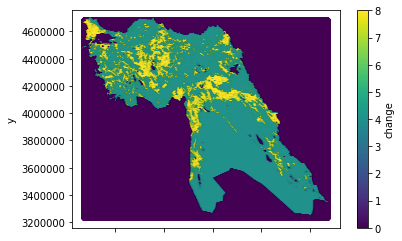

In [91]:
merge.plot.scatter(x='x',y='y',c='change',colormap='viridis')

In [20]:
data_frames = [df_2001, df_2002, df_2009, df_2010, df_2011, df_2017]

In [24]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['row','col','x','y'],
                                            how='outer'), data_frames)

In [32]:
df_merged

,row,col,value_x,x,y,value_y,value_x,value_y,value_x,value_y
0,0,0,0,2.181391e+06,4.682055e+06,0,0,0,0,0
1,0,1,0,2.181891e+06,4.682055e+06,0,0,0,0,0
2,0,2,0,2.182391e+06,4.682055e+06,0,0,0,0,0
3,0,3,0,2.182891e+06,4.682055e+06,0,0,0,0,0
4,0,4,0,2.183391e+06,4.682055e+06,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14530309,2901,5002,0,4.682391e+06,3.231555e+06,0,0,0,0,0
14530310,2901,5003,0,4.682891e+06,3.231555e+06,0,0,0,0,0
14530311,2901,5004,0,4.683391e+06,3.231555e+06,0,0,0,0,0
14530312,2901,5005,0,4.683891e+06,3.231555e+06,0,0,0,0,0


In [92]:
A = gr.GeoRaster(merge, GeoT, nodata_value=NDV)

NameError: name 'GeoT' is not defined

In [93]:
gdf = (
    gpd.GeoDataFrame(merge, 
                    geometry = gpd.points_from_xy(df.x, df.y),
                    crs="EPSG:4326")
                    [['change','geometry']]
                    )

In [ ]:
gdf.plot()

In [86]:
merge.to_stata('merge.dta')  

In [17]:
df.shape

(14530314, 5)

In [18]:
df['row'].value_counts(sort=False)

0       5007
1       5007
2       5007
3       5007
4       5007
        ... 
2896    5007
2899    5007
2898    5007
2901    5007
2900    5007
Name: row, Length: 2902, dtype: int64

In [19]:
df['col'].value_counts(sort=False)

0       2902
1       2902
2       2902
3       2902
4       2902
        ... 
5000    2902
5001    2902
5006    2902
5004    2902
5005    2902
Name: col, Length: 5007, dtype: int64

Value	Color	Description
0	1c0dff	Water Bodies: at least 60% of area is covered by permanent water bodies.
1	05450a	Evergreen Needleleaf Forests: dominated by evergreen conifer trees (canopy >2m). Tree cover >60%.
2	086a10	Evergreen Broadleaf Forests: dominated by evergreen broadleaf and palmate trees (canopy >2m). Tree cover >60%.
3	54a708	Deciduous Needleleaf Forests: dominated by deciduous needleleaf (larch) trees (canopy >2m). Tree cover >60%.
4	78d203	Deciduous Broadleaf Forests: dominated by deciduous broadleaf trees (canopy >2m). Tree cover >60%.
5	009900	Mixed Forests: dominated by neither deciduous nor evergreen (40-60% of each) tree type (canopy >2m). Tree cover >60%.
6	c6b044	Closed Shrublands: dominated by woody perennials (1-2m height) >60% cover.
7	dcd159	Open Shrublands: dominated by woody perennials (1-2m height) 10-60% cover.
8	dade48	Woody Savannas: tree cover 30-60% (canopy >2m).
9	fbff13	Savannas: tree cover 10-30% (canopy >2m).
10	b6ff05	Grasslands: dominated by herbaceous annuals (<2m).
11	27ff87	Permanent Wetlands: permanently inundated lands with 30-60% water cover and >10% vegetated cover.
12	c24f44	Croplands: at least 60% of area is cultivated cropland.
13	a5a5a5	Urban and Built-up Lands: at least 30% impervious surface area including building materials, asphalt and vehicles.
14	ff6d4c	Cropland/Natural Vegetation Mosaics: mosaics of small-scale cultivation 40-60% with natural tree, shrub, or herbaceous vegetation.
15	f9ffa4	Non-Vegetated Lands: at least 60% of area is non-vegetated barren (sand, rock, soil) or permanent snow and ice with less than 10% vegetation.

In [20]:
df['value'].value_counts(sort=False)

0     8464995
1       67525
2        1722
4       58463
5       36890
6         226
7      312683
8      159589
9      232985
10    1805747
11      10904
12    1181769
13      72357
14      19458
15    2105001
Name: value, dtype: int64

In [52]:
gdf

,value,geometry
0,0,POINT (2181390.646 4682054.677)
1,0,POINT (2181890.646 4682054.677)
2,0,POINT (2182390.646 4682054.677)
3,0,POINT (2182890.646 4682054.677)
4,0,POINT (2183390.646 4682054.677)
...,...,...
14530309,0,POINT (4682390.646 3231554.677)
14530310,0,POINT (4682890.646 3231554.677)
14530311,0,POINT (4683390.646 3231554.677)
14530312,0,POINT (4683890.646 3231554.677)


In [56]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open(raster) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[26.442834, 42.273847], [22.429829, 29.196552], [48.171701, 29.196552], [56.790281, 42.273847], [26.442834, 42.273847]]]}


In [57]:
dataset.name

'/Users/javierparada/Documents/Cursos/BITSS RT2/Michuda/MODISLandCovertype2.tif'

In [58]:
dataset.height

2902

In [59]:
dataset.width

5007

In [60]:
dataset.crs

CRS.from_wkt('PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [61]:
dataset.indexes

(1,)

In [62]:
band1 = dataset.read()

RasterioIOError: Dataset is closed: /Users/javierparada/Documents/Cursos/BITSS RT2/Michuda/MODISLandCovertype2.tif

In [63]:
df.to_excel("output2.xlsx")  



ValueError: This sheet is too large! Your sheet size is: 14530314, 6 Max sheet size is: 1048576, 16384

In [35]:
# Save transformed data to GeoTiff
data2 = data**2
data2.to_tiff('./data2')

In [36]:
# Algebra with rasters
data3 = np.sin(data.raster) / data2
data3.plot()

# Notice that by using the data.raster object,
# you can do any mathematical operation that handles
# Numpy Masked Arrays

# Find value at point (x,y) or at vectors (X,Y)
value = data.map_pixel(x,y)
Value = data.map_pixel(X,Y)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''